<a href="https://colab.research.google.com/github/tsengcc2023/Financial-Big-Data-Analysis/blob/main/week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

week2作業_金融市場概述與資料收集、預處理

用 Python 撰寫程式分別從證券交易所、Yahoo奇摩爬取股價資料，並進行可視化。



# 1️⃣ 從證券交易所爬取股價資料

## import

In [ ]:
# 發送 HTTP 請求以獲取網路上的資料
import requests
import pandas as pd
# 用來處理時間
import datetime as dt

## 取得證交所上市公司個股日成交資訊

In [ ]:
# "台積電"股票代號
stock_id = '2330'

# 獲取今天的日期（型別：str）
date = dt.date.today().strftime("%Y%m%d")
print('今日日期：', date)

# 取得證交所網站資料，帶入網址參數 date：時間，stock_id：股票代號
# https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date=20240918&stockNo=2330
stock_data = requests.get(f'https://www.twse.com.tw/rwd/zh/ \
            afterTrading/STOCK_DAY?date={date}&stockNo={stock_id}')

# 將結果轉換 JSON 格式
json_data = stock_data.json()

# 將 JSON 格式轉換爲 Dataframe 格式，
# 方便在 Python 中處理結構化資料
df = pd.DataFrame(data=json_data['data'],
                  columns=json_data['fields'])

df

今日日期： 20240921


,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,113/09/02,"19,272,593","18,270,058,260",950.00,955.00,943.00,948.00,+4.00,"31,642"
1,113/09/03,"23,205,623","21,908,471,541",948.00,952.00,939.00,940.00,-8.00,"47,139"
2,113/09/04,"93,169,835","83,424,133,824",894.00,905.00,888.00,889.00,-51.00,"393,210"
3,113/09/05,"34,147,890","30,998,595,394",907.00,915.00,900.00,902.00,+13.00,"63,902"
4,113/09/06,"28,248,063","25,786,016,936",909.00,918.00,903.00,918.00,+16.00,"38,415"
5,113/09/09,"38,448,946","34,456,838,126",892.00,900.00,891.00,899.00,-19.00,"102,365"
6,113/09/10,"34,312,646","31,067,424,234",907.00,911.00,901.00,904.00,+5.00,"45,141"
7,113/09/11,"19,513,256","17,621,000,956",906.00,906.00,900.00,901.00,-3.00,"30,789"
8,113/09/12,"43,749,260","40,999,951,508",936.00,944.00,928.00,940.00,X0.00,"80,643"
9,113/09/13,"28,307,441","26,795,862,243",955.00,955.00,939.00,947.00,+7.00,"39,071"


In [ ]:
# 安裝 wget 用來下載字體
!pip install wget

import requests
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import fontManager
import wget

# 下載中文字體
wget.download("https://github.com/GrandmaCan/ML/raw/main/Resgression/ChineseFont.ttf")

# 將下載的中文字體引入到 matplotlib 的字體管理
fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")  # 設定 matplotlib 使用此字體

# "台積電"股票代號
stock_id = '2330'

# 獲取今天的日期（型別：str）
date = dt.date.today().strftime("%Y%m%d")
print('今日日期：', date)

# 取得證交所網站資料，帶入網址參數 date：時間，stock_id：股票代號
stock_data = requests.get(f'https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date={date}&stockNo={stock_id}')

# 將結果轉換為 JSON 格式
json_data = stock_data.json()

# 將 JSON 資料轉換為 DataFrame 格式，方便進行後續處理
df = pd.DataFrame(data=json_data['data'], columns=json_data['fields'])

# 將收盤價轉換成數字格式，去掉千位逗號
df['收盤價'] = pd.to_numeric(df['收盤價'].str.replace(',', ''), errors='coerce')




  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=7f342c79a0e7d3186e828d2f8d98f2cd2e0b57281c55374fcfe1e32419cbb0ff
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
今日日期： 20240921


## 可視化

In [ ]:
#下載中文字體
!pip install wget
import wget

wget.download("https://github.com/GrandmaCan/ML/raw/main/Resgression/ChineseFont.ttf")

'ChineseFont (1).ttf'

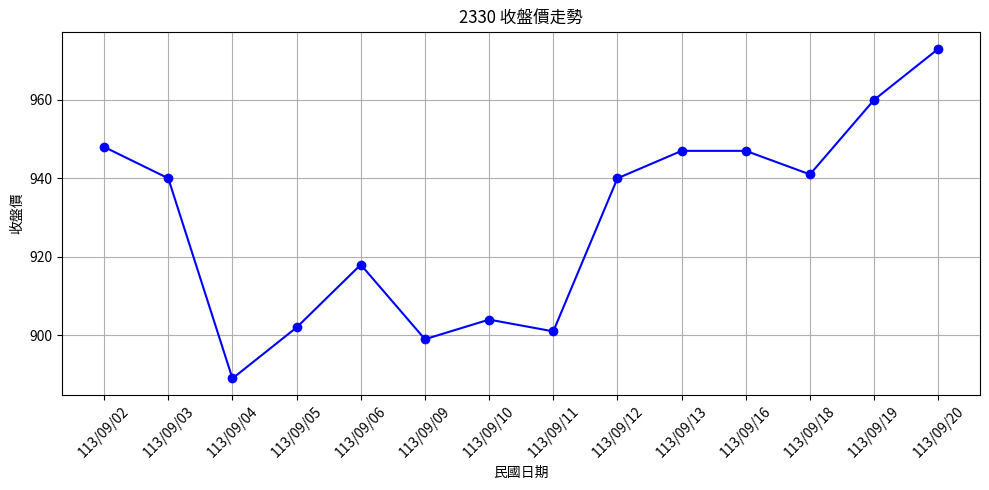

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import fontManager

# 將下載的中文字體引入到 matplotlib 的字體管理
fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")  # 設定 matplotlib 使用此字體

# 繪製收盤價折線圖
plt.figure(figsize=(10, 5))
plt.plot(df['日期'], df['收盤價'], marker='o', linestyle='-', color='b')
plt.title(f'{stock_id} 收盤價走勢')  # 中文標題
plt.xlabel('民國日期')  # 保留民國日期
plt.ylabel('收盤價')
plt.grid(True)
plt.xticks(rotation=45)  # 調整日期顯示角度
plt.tight_layout()
plt.show()

# 2️⃣ 從Yahoo奇摩爬取股價資料（用 BeautifulSoup4）

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [ ]:
# 定義抓取 Yahoo 財報的函數
def url_find(url):
    words = url.split('/')
    laset_word = words[-1]

    response = requests.get(url)
    html = response.content
    soup = BeautifulSoup(html, 'html.parser')

    table_soup = soup.find('section', {'id': 'qsp-{}-table'.format(laset_word)})
    table_fields = table_soup.find('div', class_='table-header')
    table_fields_lines = list(table_fields.stripped_strings)

    data_rows = table_soup.find_all('li', class_='List(n)')
    data = []
    for row in data_rows:
        row_data = list(row.stripped_strings)
        data.append(row_data)

    df = pd.DataFrame(data, columns=table_fields_lines)
    return df

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# 下載中文字體以顯示中文
!pip install wget
import wget
wget.download("https://github.com/GrandmaCan/ML/raw/main/Resgression/ChineseFont.ttf")
# 設定字體
mpl.font_manager.fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")

# 可視化現金流量的函數
def visualize_multiple_cash_flows(df):
    plt.figure(figsize=(12, 6))

    # 繪製每個現金流的趨勢
    for column in ['營業現金流', '投資現金流', '融資現金流', '自由現金流', '淨現金流']:
        df[column] = pd.to_numeric(df[column].str.replace(',', ''), errors='coerce')  # 轉換為數字
        plt.plot(df['年度/季別'], df[column], marker='o', label=column)  # 繪製圖表

    plt.title('現金流趨勢')
    plt.xlabel('年度/季別')
    plt.ylabel('金額 (元)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

      年度/季別        營業現金流         投資現金流         融資現金流       自由現金流          淨現金流
15  2020 Q3  190,171,227   -96,079,669    47,434,066  94,091,558   136,581,670
16  2020 Q2  170,334,959  -129,750,164     5,912,053  40,584,795    36,836,214
17  2020 Q1  203,029,442  -188,993,268   -40,757,411  14,036,174   -24,622,107
18  2019 Q4  202,954,417  -171,605,106   -17,182,776  31,349,311     2,969,036
19  2019 Q3  141,753,021  -108,290,117  -229,112,243  33,462,904  -197,266,962


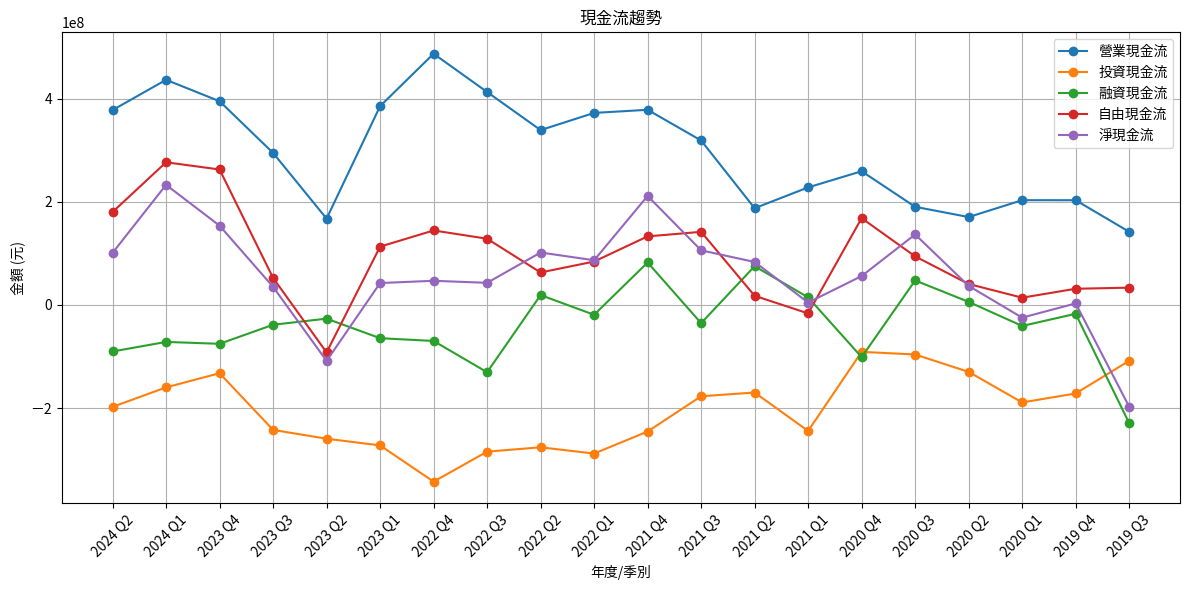

In [ ]:
if __name__ == '__main__':
    # 設定股票代號
    stock_id = '2330'  # 台積電的代號

    # 抓取現金流量表的 URL
    url = f'https://tw.stock.yahoo.com/quote/{stock_id}/cash-flow-statement'

    # 抓取資料
    df = url_find(url).transpose()

    # 資料處理
    df.columns = df.iloc[0]
    df = df[1:]
    df.insert(0, '年度/季別', df.index)
    df.columns.name = None
    df.reset_index(drop=True, inplace=True)

    # 輸出資料後5筆
    print(df.tail())

    # 呼叫可視化函數
    visualize_multiple_cash_flows(df)